<a href="https://colab.research.google.com/github/Mirza9003/Hydrology-Unit-Hydrograph-Automation/blob/main/Hydrology_Unit_Hydrograph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOMATED UNIT HYDROGRAPH GENERATOR: By Mirza Md Tasnim Mukarram, University of Iowa**

In [1]:
# ============================================================
#  AUTOMATED UNIT HYDROGRAPH GENERATOR (Google Colab Version)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:

# ============================================================
# 1. Create and download a CSV template for clients
# ============================================================
template = pd.DataFrame({
    "Time_hr": np.arange(0, 12, 1),
    "Rainfall_in_hr": [0, 0.5, 1.5, 1.5, 0.5, 0, 0, 0, 0, 0, 0, 0],
    "Discharge_cfs": [100, 100, 300, 700, 1000, 800, 600, 400, 300, 200, 100, 100]
})

template.to_csv("UnitHydrograph_Template.csv", index=False)
print("✅ CSV template generated: UnitHydrograph_Template.csv")
print("You can share this file with clients — they only need to fill in the same 3 columns.\n")

files.download("UnitHydrograph_Template.csv")




✅ CSV template generated: UnitHydrograph_Template.csv
You can share this file with clients — they only need to fill in the same 3 columns.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# ============================================================
# 2. Upload client data (rainfall & discharge)
# ============================================================
print("Please upload your rainfall–discharge CSV file:")
uploaded = files.upload()

# Read the uploaded CSV file
filename = next(iter(uploaded))
df = pd.read_csv(filename)



Please upload your rainfall–discharge CSV file:


Saving UnitHydrograph_Template.csv to UnitHydrograph_Template.csv


In [3]:
# ============================================================
# 3. User Inputs for constants
# ============================================================
f = float(input("Enter constant infiltration rate f (in/hr): "))
baseflow = float(input("Enter baseflow (cfs): "))



Enter constant infiltration rate f (in/hr): 0.5
Enter baseflow (cfs): 100


In [4]:
# ============================================================
# 4. Core Calculations
# ============================================================
df["Rainfall_Excess_in_hr"] = np.maximum(df["Rainfall_in_hr"] - f, 0)
df["Direct_Runoff_cfs"] = df["Discharge_cfs"] - baseflow

net_rainfall = df["Rainfall_Excess_in_hr"].sum()
df["UH_cfs"] = df["Direct_Runoff_cfs"] / net_rainfall



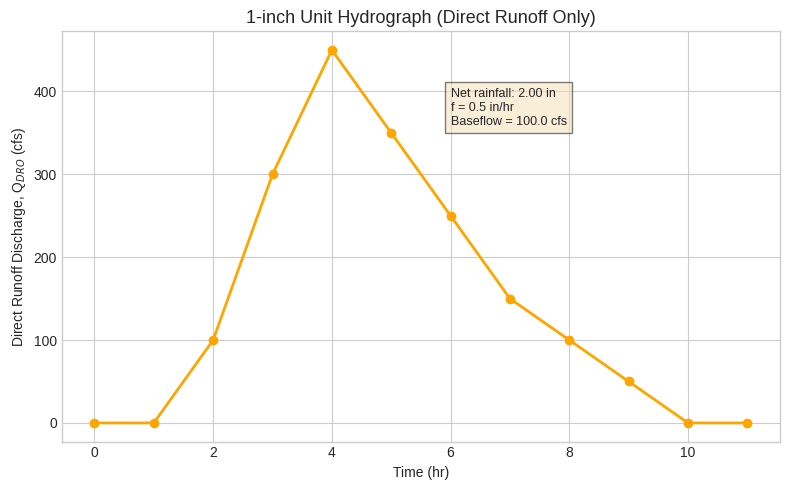

In [5]:
# ============================================================
# 5. Plotting
# ============================================================

# --- (a) Unit Hydrograph ---
plt.figure(figsize=(8,5))
plt.plot(df["Time_hr"], df["UH_cfs"], 'o-', linewidth=2, color='orange', markersize=6)
plt.title("1-inch Unit Hydrograph (Direct Runoff Only)", fontsize=13)
plt.xlabel("Time (hr)")
plt.ylabel("Direct Runoff Discharge, Q$_{DRO}$ (cfs)")
plt.text(
    6, max(df["UH_cfs"])*0.8,
    f"Net rainfall: {net_rainfall:.2f} in\nf = {f} in/hr\nBaseflow = {baseflow} cfs",
    fontsize=9, bbox=dict(facecolor='wheat', alpha=0.5)
)
plt.tight_layout()
plt.show()


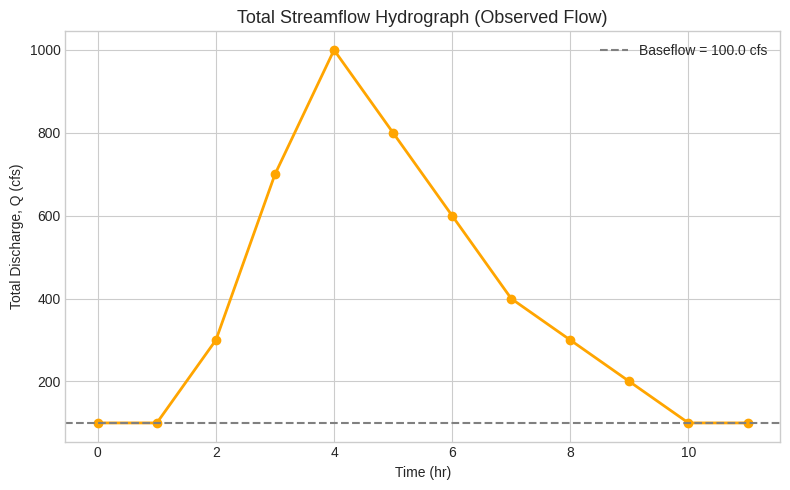

In [6]:
# --- (b) Total Hydrograph ---
plt.figure(figsize=(8,5))
plt.plot(df["Time_hr"], df["Discharge_cfs"], 'o-', linewidth=2, color='orange', markersize=6)
plt.axhline(y=baseflow, color='gray', linestyle='--', label=f'Baseflow = {baseflow} cfs')
plt.title("Total Streamflow Hydrograph (Observed Flow)", fontsize=13)
plt.xlabel("Time (hr)")
plt.ylabel("Total Discharge, Q (cfs)")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:

# ============================================================
# 6. Output results
# ============================================================
print(f"\n✅ Computation Complete")
print(f"Net rainfall depth = {net_rainfall:.2f} inches")
print(f"Peak of Unit Hydrograph = {df['UH_cfs'].max():.1f} cfs at t = {df.loc[df['UH_cfs'].idxmax(), 'Time_hr']} hr")

# Show final computed table
display(df)

# Optionally save and download the results
df.to_csv("Computed_UnitHydrograph.csv", index=False)
files.download("Computed_UnitHydrograph.csv")
print("✅ Results saved as Computed_UnitHydrograph.csv")


✅ Computation Complete
Net rainfall depth = 2.00 inches
Peak of Unit Hydrograph = 450.0 cfs at t = 4 hr


,Time_hr,Rainfall_in_hr,Discharge_cfs,Rainfall_Excess_in_hr,Direct_Runoff_cfs,UH_cfs
0,0,0.0,100,0.0,0.0,0.0
1,1,0.5,100,0.0,0.0,0.0
2,2,1.5,300,1.0,200.0,100.0
3,3,1.5,700,1.0,600.0,300.0
4,4,0.5,1000,0.0,900.0,450.0
5,5,0.0,800,0.0,700.0,350.0
6,6,0.0,600,0.0,500.0,250.0
7,7,0.0,400,0.0,300.0,150.0
8,8,0.0,300,0.0,200.0,100.0
9,9,0.0,200,0.0,100.0,50.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Results saved as Computed_UnitHydrograph.csv
